# Explore here

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [7]:
df.index = df['date'].dt.date

In [8]:
df.drop('date',axis=1,inplace=True)

In [9]:
df

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


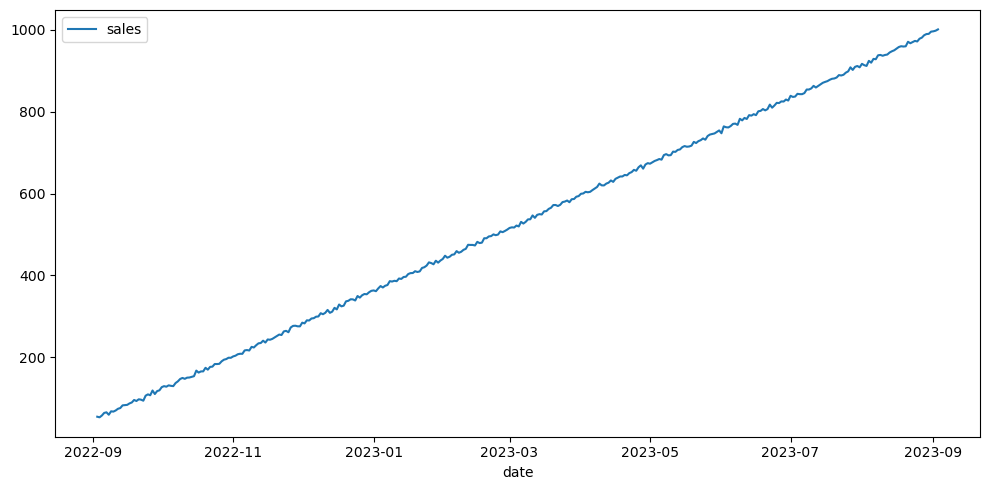

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 30)
decomposition

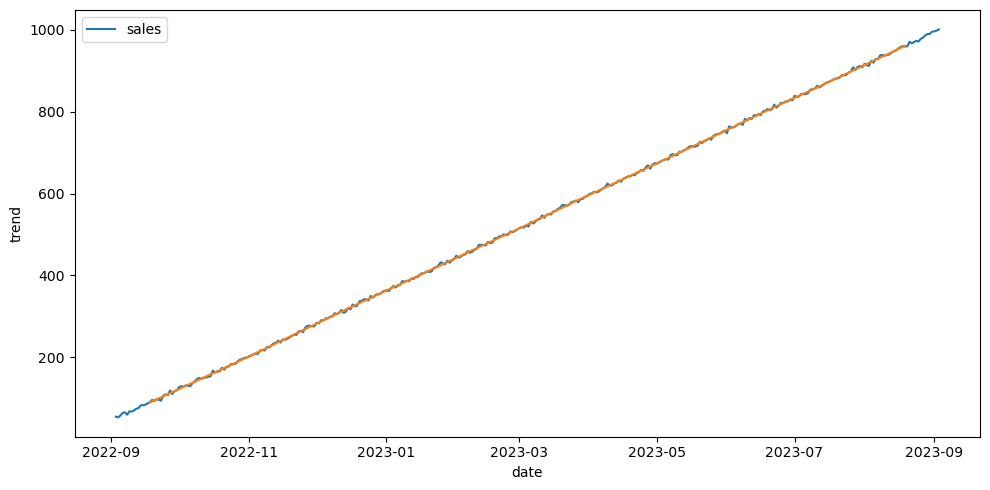

In [12]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

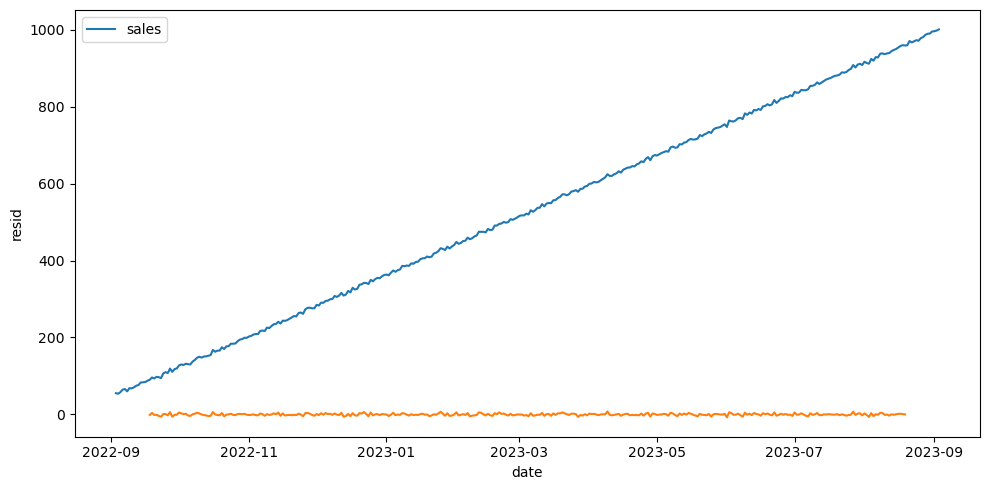

In [14]:
ruido = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = ruido)

plt.tight_layout()

plt.show()

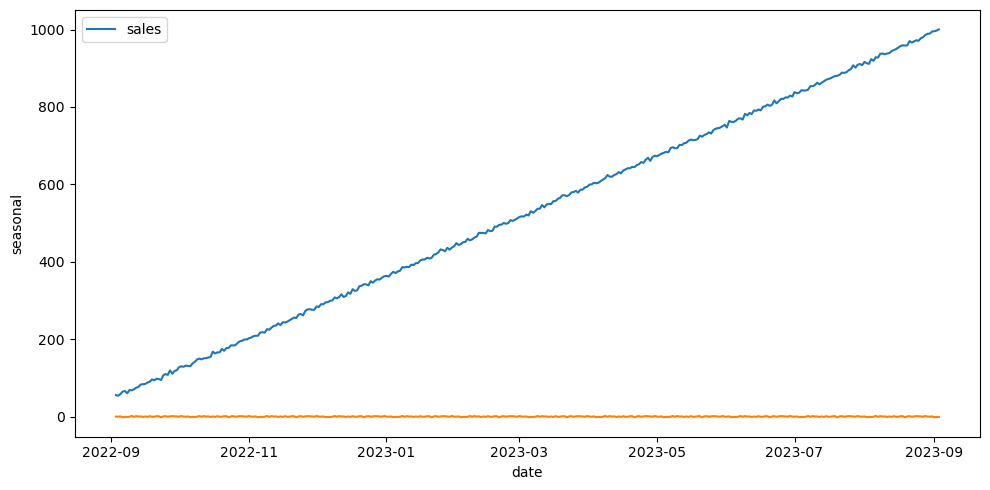

In [15]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

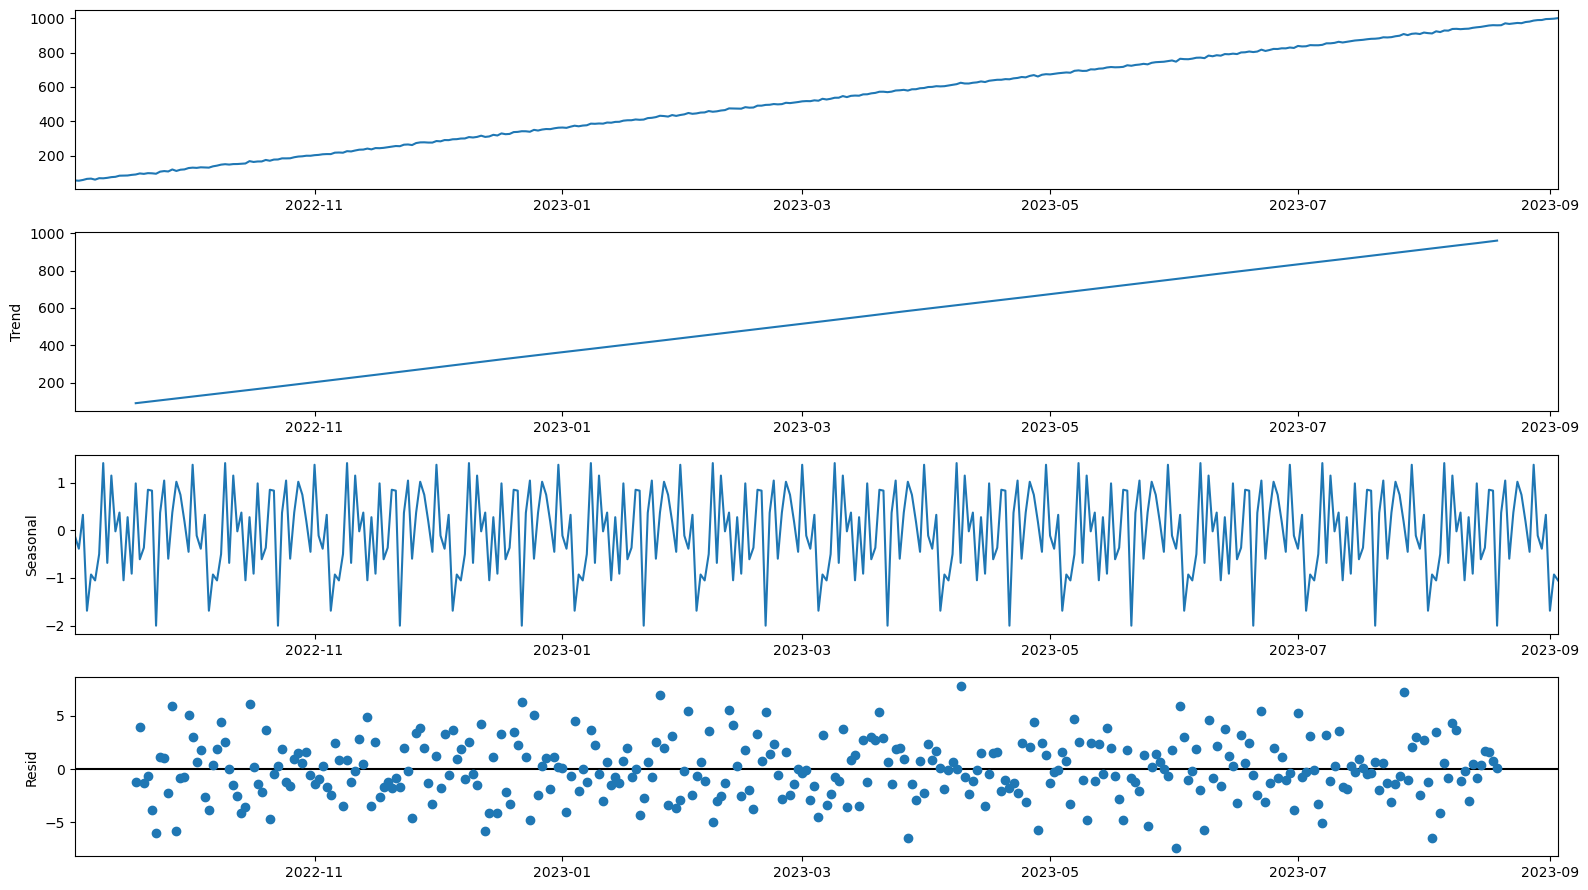

In [16]:
fig = decomposition.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

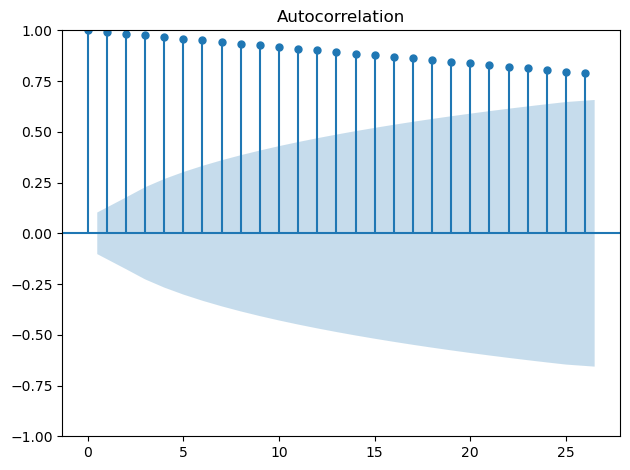

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df)

plt.tight_layout()

plt.show()

In [18]:
df.index = pd.to_datetime(df.index)
train = df.loc[:'2023-08-03']
test = df.loc['2023-08-04':]

In [19]:
train

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-07-30,911.145675
2023-07-31,907.940014
2023-08-01,916.429348


In [20]:
from pmdarima import auto_arima

model = auto_arima(train, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1694.534, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1923.639, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1811.695, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1691.374, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2023.851, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1690.961, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1692.867, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1695.374, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1690.898, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1692.880, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1983.797, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.229 seconds


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2023-08-04 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -841.449
Date:                Mon, 24 Mar 2025   AIC                           1690.898
Time:                        17:00:49   BIC                           1706.143
Sample:                    09-03-2022   HQIC                          1696.976
                         - 08-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5951      0.011    239.847      0.000       2.574       2.616
ma.L1         -1.0289      0.052    -19.943      0.000      -1.130      -0.928
ma.L2          0.0913      0.051      1.779      0.075      -0.009       0.192
sigma2         8.9718      0.733     12.235      0.000       7.535      10.409
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.98   Prob(JB):                         0.70
Heteroskedasticity (H):               0.89   Skew:                             0.08
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
mes_predicho = model.predict(31)

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test,mes_predicho)

6.751951914366161

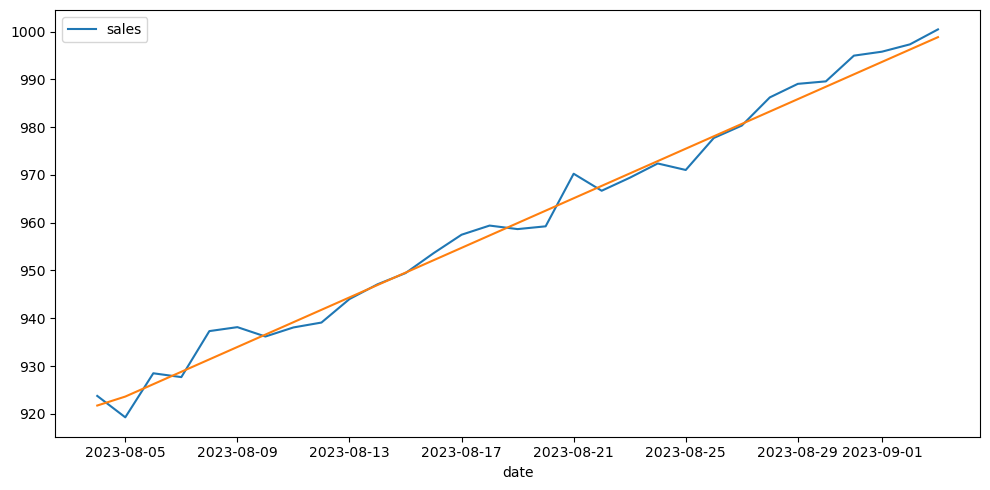

In [26]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = test)
sns.lineplot(data = mes_predicho)

plt.tight_layout()

plt.show()